In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.preprocessing import StandardScaler



In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


C:\Users\Shekhar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


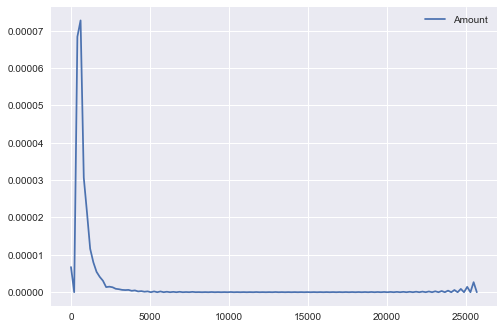

In [4]:
sns.kdeplot(df['Amount'])

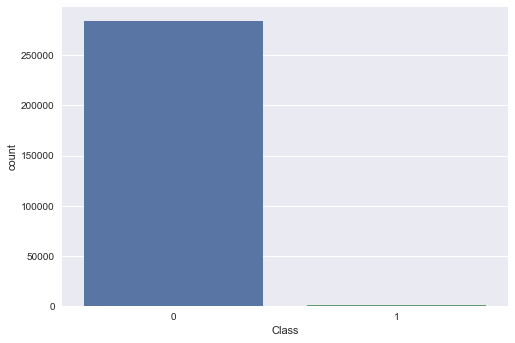

In [5]:
sns.countplot('Class',data=df)

Becuse the data is unbalanced , we try to balance the data by limiting the data of the larger category

In [6]:
# for undersampling we need a portion of majority class and will take whole data of minority class
# count fraud transaction is the total number of fraud transaction
# now lets us see the index of fraud cases
fraud_indices= np.array(df[df.Class==1].index)
normal_indices = np.array(df[df.Class==0].index)
Count_Fraud_transacation = len(fraud_indices)
#now let us a define a function for make undersample data with different proportion
#different proportion means with different proportion of normal classes of data
fraud_trans=df[df.Class==1]
real_trans=df[df.Class==0]

In [7]:
# before starting we should standridze our ampount column
df["Normalized Amount"] = StandardScaler().fit_transform(df['Amount'].reshape(-1, 1))
df.drop(["Time","Amount"],axis=1,inplace=True)
df.head()

C:\Users\Shekhar\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


C:\Users\Shekhar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


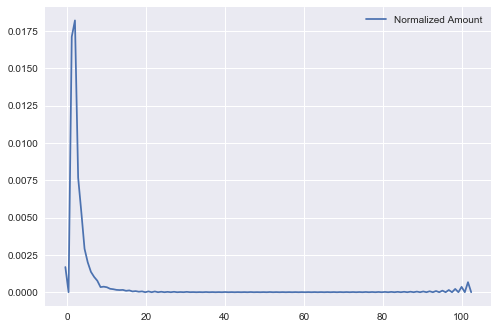

In [13]:
sns.kdeplot(df["Normalized Amount"])

In [12]:
def detect_fraud(normal_indices,times):
    Normal_indices_undersample = np.array(np.random.choice(normal_indices,(times*Count_Fraud_transacation),replace=False))
    undersample_data= np.concatenate([fraud_indices,Normal_indices_undersample])
    undersample_data = df.iloc[undersample_data,:]
    X = undersample_data.ix[:, df.columns != 'Class']
    y = undersample_data['Class'] 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)
    log = LogisticRegression(C=10)
    log.fit(X_train,y_train)
    pred = log.predict(X_test)
    print("Number of 1 - ",y_test[y_test == 1].count())
    print("Number of 0 - ",y_test[y_test == 0].count())
    print(confusion_matrix(pred,y_test))
    print(classification_report(pred,y_test))
    
    
    
    

C:\Users\Shekhar\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Number of 1 -  147
Number of 0 -  149
             precision    recall  f1-score   support

          0       0.98      0.89      0.93       164
          1       0.88      0.98      0.92       132

avg / total       0.93      0.93      0.93       296

Number of 1 -  153
Number of 0 -  290
             precision    recall  f1-score   support

          0       0.97      0.96      0.96       294
          1       0.92      0.94      0.93       149

avg / total       0.95      0.95      0.95       443

Number of 1 -  149
Number of 0 -  442
             precision    recall  f1-score   support

          0       0.99      0.96      0.97       456
          1       0.87      0.96      0.91       135

avg / total       0.96      0.96      0.96       591



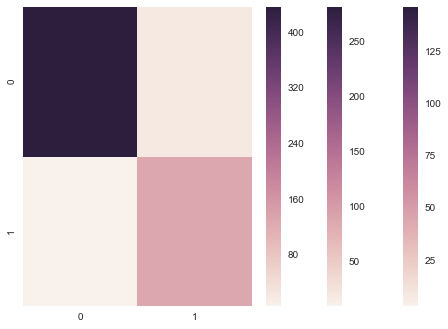

In [11]:
for i in range(1,4):
    detect_fraud(normal_indices,i)